I used the BeautifulSoup library to scrap historical stock data from the market watch website. I used the pandas data structure to organize and clean the scrapped data. Then, I used the matplotlib library to graphically display the stock price for the Facebook and Microsoft stock over a 1 month period. 

In [143]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [144]:
def get_soup_obj(ticker):
    try:
        url = f'https://www.marketwatch.com/investing/stock/{ticker}/download-data?siteid=mktw&date=&x=0&y=0'
    except:
        print('sorry something went wrong, ticker symbol may not exist')
    html_text = requests.get(url).text
    return BeautifulSoup(html_text, 'html.parser')

In [145]:
def get_stock_data(soup_obj):
    data_frame = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    try:
        stock_entries = soup_obj.find('tbody', class_='table__body row-hover').find_all('tr')
        for entry in stock_entries:            
            date_input = entry.find('td', class_='overflow__cell fixed--column').find('div', class_='cell__content u-secondary').text
            attributes_list = entry.find_all('td', class_='overflow__cell')[1:]
            open_input = float(attributes_list[0].text.replace('$', ''))
            high_input = float(attributes_list[1].text.replace('$', ''))
            low_input = float(attributes_list[2].text.replace('$', ''))
            close_input = float(attributes_list[3].text.replace('$', ''))
            volume_input = int(attributes_list[4].text.replace(',', ''))
            
            data_frame = data_frame.append(pd.Series({
                'date' : date_input,
                'open' : open_input, 
                'high' : high_input,
                'low' : low_input,
                'close' : close_input,
                'volume': volume_input
            }), ignore_index = True)
            
        data_frame['date'] = pd.to_datetime(data_frame['date'])
        data_frame.set_index('date', inplace=True)
        return data_frame
    except:
        print('unable to find stock info, something went wrong')

Note: the time to data scrape 40 entries is about 586 ms

In [146]:
%%time
facebook_page = get_soup_obj('FB')
fb_stock = get_stock_data(facebook_page)
msft_page = get_soup_obj('MSFT')
msft_stock = get_stock_data(msft_page)

CPU times: user 180 ms, sys: 5.94 ms, total: 186 ms
Wall time: 586 ms


In [147]:
fb_stock

,open,high,low,close,volume
date,,,,,
2021-07-14,354.56,355.20,346.73,347.63,13894220
2021-07-13,351.50,358.49,348.80,352.09,11455960
2021-07-12,351.23,354.19,349.64,353.16,10018620
2021-07-09,345.32,350.71,345.27,350.42,13018690
2021-07-08,345.73,348.33,342.56,345.65,14406460
2021-07-07,355.26,356.49,350.00,350.49,14218870
2021-07-06,356.50,358.79,349.18,352.78,13488460
2021-07-02,355.10,356.44,352.62,354.70,11524610
2021-07-01,346.82,354.67,346.50,354.39,17137020


In [148]:
msft_stock

,open,high,low,close,volume
date,,,,,
2021-07-14,282.35,283.66,280.55,282.51,23113660
2021-07-13,277.52,282.85,277.39,280.98,26120131
2021-07-12,279.16,279.77,276.58,277.32,18931699
2021-07-09,275.72,278.05,275.32,277.94,23916670
2021-07-08,276.90,278.73,274.87,277.42,24618590
2021-07-07,279.40,280.69,277.15,279.93,23260029
2021-07-06,278.03,279.37,274.30,277.66,31565561
2021-07-02,272.82,278.00,272.50,277.65,26474410
2021-07-01,269.61,271.84,269.60,271.60,16725320


Check the facebook and tesla stock dataframe to ensure that there are no null values

In [149]:
fb_stock[fb_stock.isnull().values]
msft_stock[msft_stock.isnull().values]

,open,high,low,close,volume
date,,,,,


Graph of Facebook and Microsoft stock prices

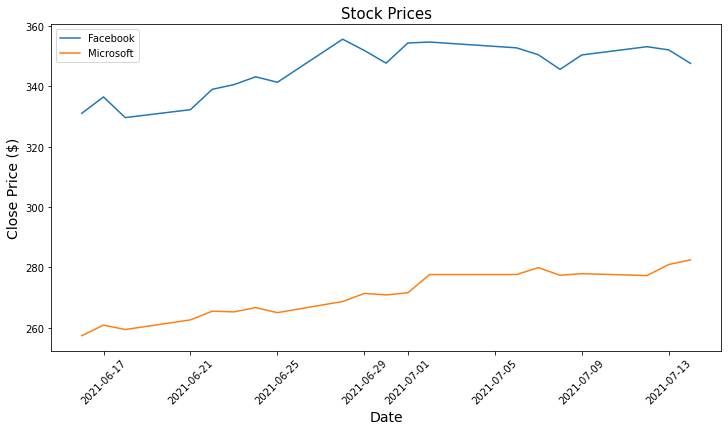

In [150]:
plt.figure(figsize=(12, 6))
plt.title('Stock Prices', size='15')
plt.plot(fb_stock.index, fb_stock['close'])
plt.plot(msft_stock.index, msft_stock['close'])
plt.legend(['Facebook', 'Microsoft'])
plt.xlabel('Date', size='14')
plt.ylabel('Close Price ($)', size='14')
plt.xticks(rotation=45)
plt.show()